In [1]:
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np 
import pandas as pd
import os
import matplotlib.pyplot as plt
import cv2

from tensorflow import keras
from tensorflow.keras import models, layers
from tensorflow.keras.models import Sequential
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint
from keras.applications import resnet
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.layers import Dense,Flatten,Conv2D,MaxPool2D,Dropout
from keras.layers import Conv2D
from keras.layers import MaxPooling2D

In [2]:
!unzip "/content/drive/MyDrive/Sign Language Project/BdSL_Word.zip"

Archive:  /content/drive/MyDrive/Sign Language Project/BdSL_Word.zip
   creating: Word/
   creating: Word/Color/
  inflating: Word/Color/color (1).jpg  
  inflating: Word/Color/color (10).jpg  
  inflating: Word/Color/color (11).jpg  
  inflating: Word/Color/color (12).jpg  
  inflating: Word/Color/color (13).jpg  
  inflating: Word/Color/color (14).jpg  
  inflating: Word/Color/color (15).jpg  
  inflating: Word/Color/color (16).jpg  
  inflating: Word/Color/color (17).jpg  
  inflating: Word/Color/color (18).jpg  
  inflating: Word/Color/color (19).jpg  
  inflating: Word/Color/color (2).jpg  
  inflating: Word/Color/color (20).jpg  
  inflating: Word/Color/color (21).jpg  
  inflating: Word/Color/color (22).jpg  
  inflating: Word/Color/color (23).jpg  
  inflating: Word/Color/color (24).jpg  
  inflating: Word/Color/color (25).jpg  
  inflating: Word/Color/color (26).jpg  
  inflating: Word/Color/color (27).jpg  
  inflating: Word/Color/color (28).jpg  
  inflating: Word/Color/colo

In [3]:
# input path for the images
base_path = '/content/Word'

In [4]:
SIZE=224
image_size = (SIZE, SIZE)
batch_size = 32
channels = 3
kernel = 4
stride = 1
pool = 2

(224, 224, 3)


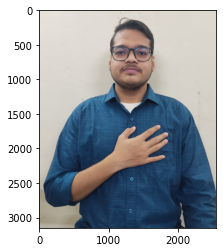

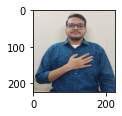

In [5]:
#show resized images
img = cv2.imread("/content/Word/Myself/myself (55).jpg")[:, :, ::-1]
width, height = SIZE, SIZE
resized_img = cv2.resize(img, (width, height))
plt.imshow(img)
plt.figure(figsize = (1.5, 1.5))
plt.imshow(resized_img)
print(resized_img.shape)

In [6]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    base_path,
    validation_split=0.2,
    subset="training",
    seed=42,
    image_size=image_size,
    batch_size=batch_size,
)
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    base_path,
    validation_split=0.2,
    subset="validation",
    seed=42,
    image_size=image_size,
    batch_size=batch_size,
)

Found 992 files belonging to 10 classes.
Using 794 files for training.
Found 992 files belonging to 10 classes.
Using 198 files for validation.


In [7]:
class_names = train_ds.class_names
num_classes = len(class_names)
class_names

['Color',
 'Friend',
 'Myself',
 'Promise',
 'Request',
 'Salam',
 'Surprise',
 'They',
 'Think',
 'You']

In [8]:
labels = ['Color','Friend','Myself','Promise','Request','Salam','Surprise','They','Think','You']

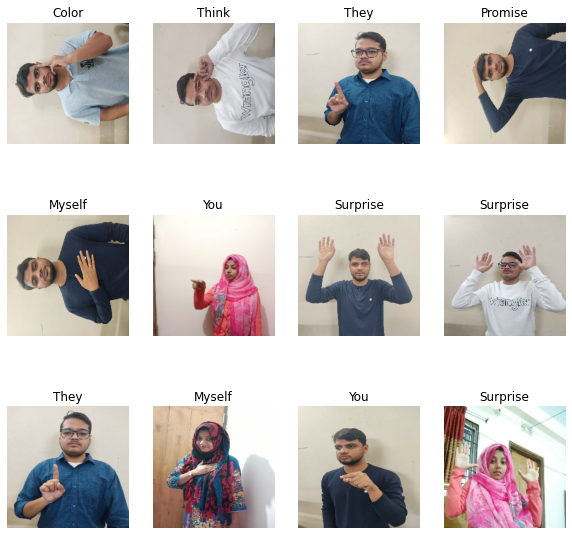

In [9]:
plt.figure(figsize=(10,10))
for image_batch, labels_batch in train_ds.take(1):
  for i in range(12):
    ax=plt.subplot(3,4,i+1)
    plt.imshow(image_batch[i].numpy().astype("uint8"))
    plt.title(class_names[labels_batch[i]])
    plt.axis("off")

##Model

In [10]:
classifier_vgg16 = VGG16(input_shape= (224,224,3),include_top=False,weights='imagenet')
for layer in classifier_vgg16.layers:
    layer.trainable = False

58900480/58889256 [==============================] - 0s 0us/step


In [11]:
classifier4 = classifier_vgg16.output#head mode
classifier4 = Flatten()(classifier4)#adding layer of flatten
classifier4 = Dense(units=256, activation='relu')(classifier4)
classifier4 = Dropout(0.6)(classifier4)
classifier4 = Dense(units=num_classes, activation='softmax')(classifier4)

model_vgg16 = Model(inputs = classifier_vgg16.input , outputs = classifier4)
model_vgg16.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [12]:
model_vgg16.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [13]:
!pip install visualkeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 989 kB 883 kB/s 


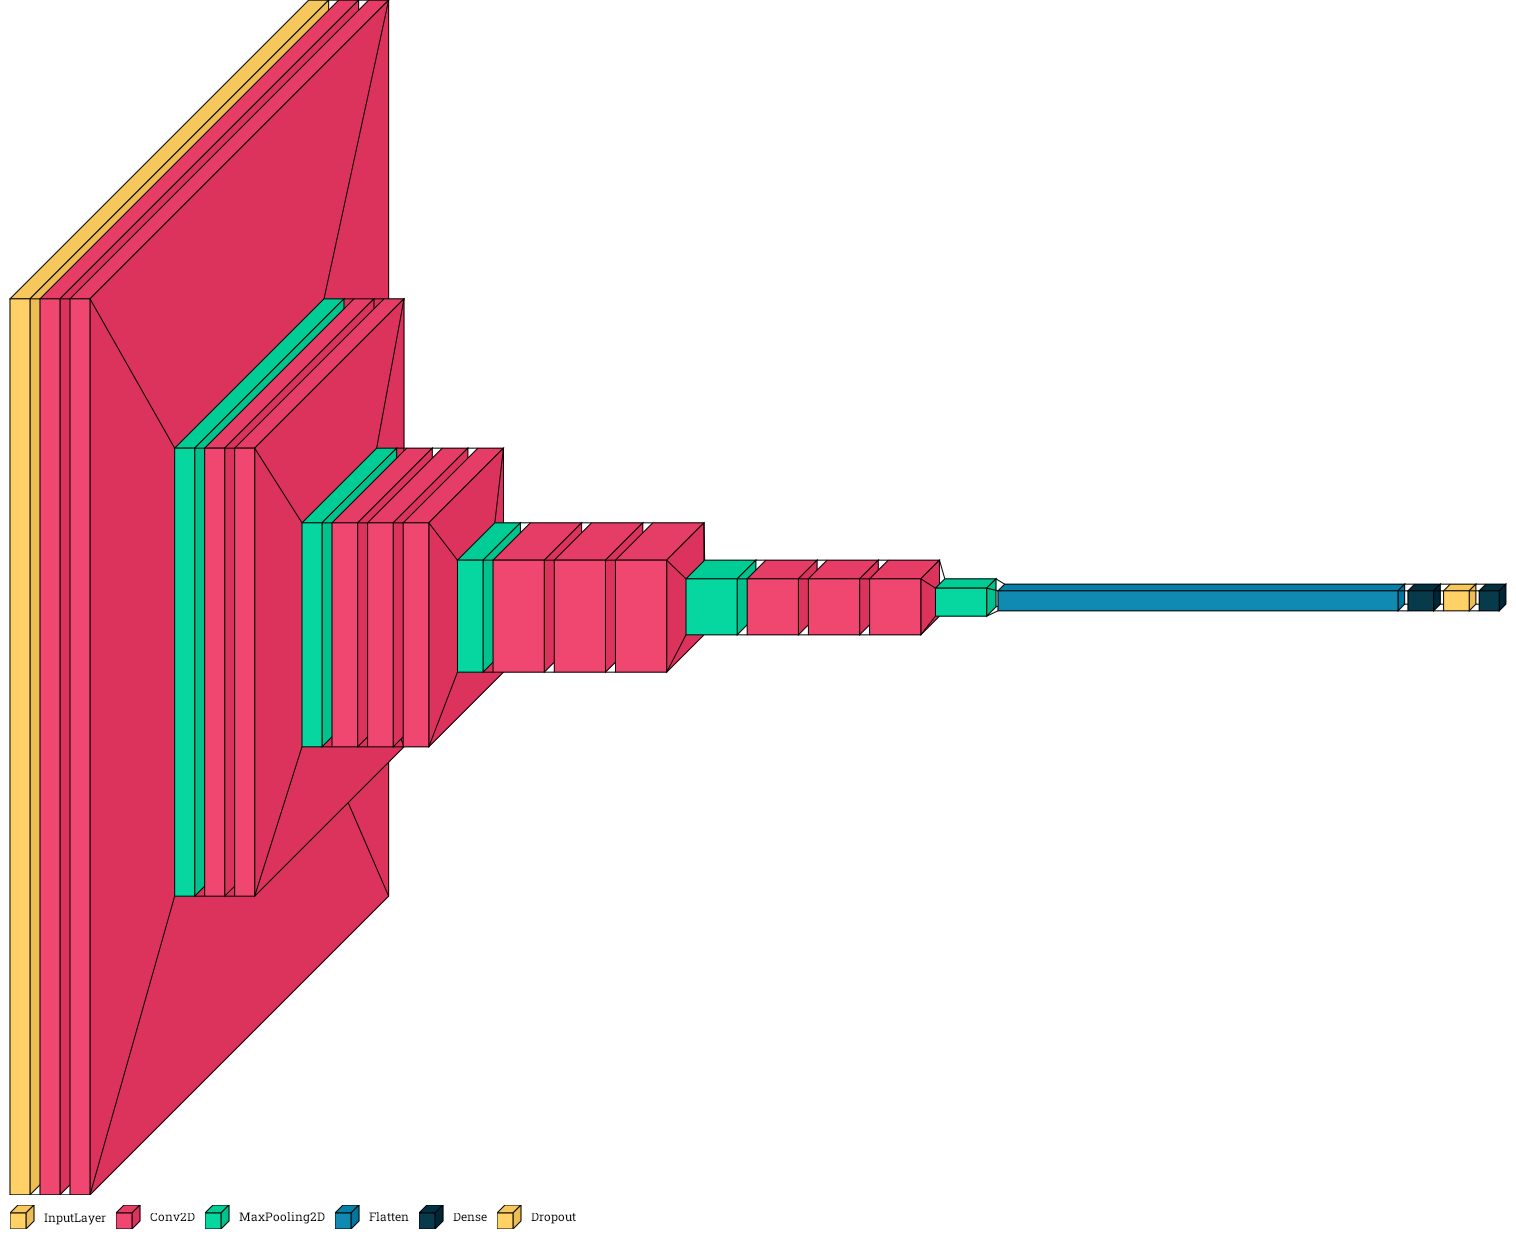

In [14]:
from PIL import ImageFont
import visualkeras
font = ImageFont.truetype("/content/drive/MyDrive/Sign Language Project/RobotoSlab-VariableFont_wght.ttf", 12)
visualkeras.layered_view(model_vgg16, legend=True, font=font)

In [15]:
history_vgg16 = model_vgg16.fit(train_ds, epochs=10, validation_data=val_ds)

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


25/25 [==============================] - 52s 1s/step - loss: 26.5163 - accuracy: 0.4232 - val_loss: 1.3847 - val_accuracy: 0.8384
Epoch 2/10
25/25 [==============================] - 34s 1s/step - loss: 3.2882 - accuracy: 0.6650 - val_loss: 0.8096 - val_accuracy: 0.8535
Epoch 3/10
25/25 [==============================] - 33s 970ms/step - loss: 1.4075 - accuracy: 0.7280 - val_loss: 0.6281 - val_accuracy: 0.8838
Epoch 4/10
25/25 [==============================] - 32s 970ms/step - loss: 1.3421 - accuracy: 0.7179 - val_loss: 0.3219 - val_accuracy: 0.8990
Epoch 5/10
25/25 [==============================] - 32s 971ms/step - loss: 0.9955 - accuracy: 0.7431 - val_loss: 0.3024 - val_accuracy: 0.9343
Epoch 6/10
25/25 [==============================] - 32s 973ms/step - loss: 0.8786 - accuracy: 0.7670 - val_loss: 0.3086 - val_accuracy: 0.9293
Epoch 7/10
25/25 [==============================] - 32s 974ms/step - loss: 0.7412 - accuracy: 0.7758 - val_loss: 0.3744 - val_accuracy: 0.9141
Epoch 8/10
25/2

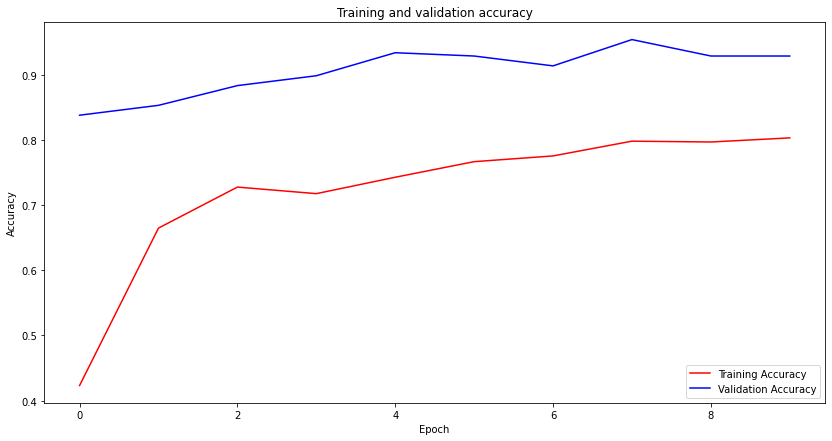

In [16]:
# Validation and Training accuracy plot
acc=history_vgg16.history['accuracy']
val_acc=history_vgg16.history['val_accuracy']
loss=history_vgg16.history['loss']
val_loss=history_vgg16.history['val_loss']

epochs=range(len(acc))

fig = plt.figure(figsize=(14,7))
plt.plot(epochs, acc, 'r', label="Training Accuracy")
plt.plot(epochs, val_acc, 'b', label="Validation Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc='lower right')
plt.show()

Text(0.5, 1.0, 'Training and validation loss')

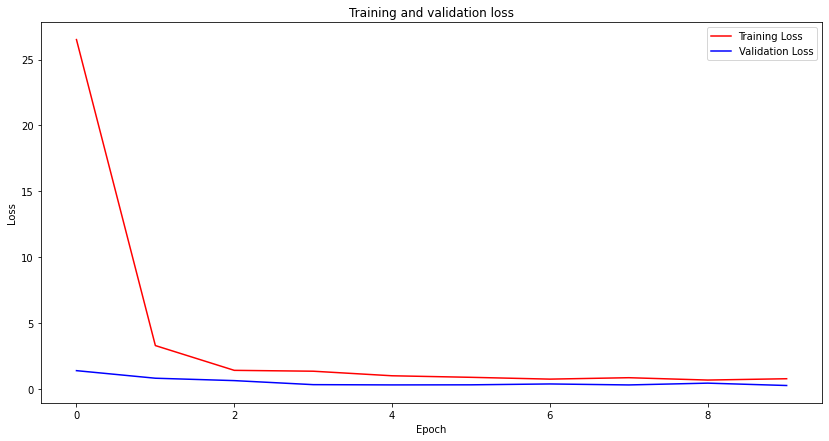

In [17]:
#Validation and Training loss plot
fig = plt.figure(figsize=(14,7))
plt.plot(epochs, loss, 'r', label="Training Loss")
plt.plot(epochs, val_loss, 'b', label="Validation Loss")
plt.legend(loc='upper right')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and validation loss')

In [18]:
loss,val_accuracy = model_vgg16.evaluate(val_ds)
print('Accuracy on validation:', val_accuracy)

7/7 [==============================] - 7s 138ms/step - loss: 0.2570 - accuracy: 0.9293
Accuracy on validation: 0.9292929172515869


In [19]:
predict = model_vgg16.predict(val_ds)

##Confusion matrix

In [20]:
#generating true vector
y_true = np.random.randint(low=0, high=10, size=1000, dtype=int)

In [21]:
classesIndexes, classesFrequency = np.unique(y_true, return_counts=True)
print('classes indexes:' , classesIndexes)
print('\n')
print('classes frequency:', classesFrequency)

classes indexes: [0 1 2 3 4 5 6 7 8 9]


classes frequency: [103  98  98 112  73 104 107 103 104  98]


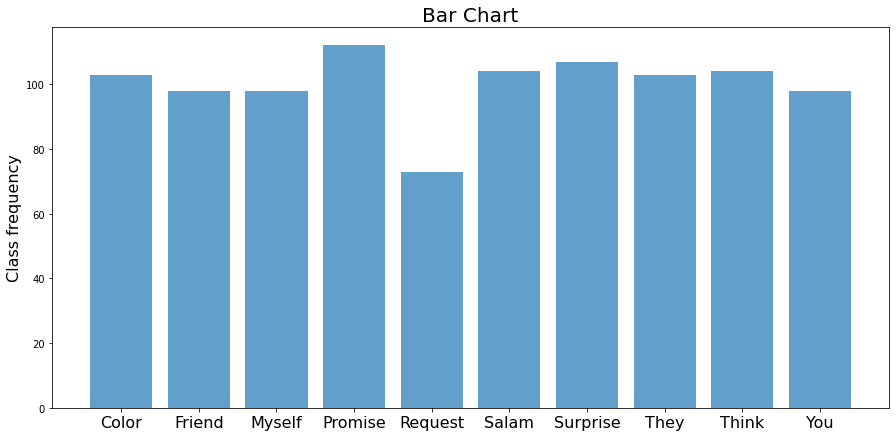

In [22]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (15.0, 7.0)
figure = plt.figure()
plt.bar(classesIndexes, classesFrequency, align='center', alpha=0.7)
plt.ylabel('Class frequency', fontsize=16)
plt.xticks(classesIndexes, class_names, fontsize=16)
plt.title('Bar Chart', fontsize=20)
plt.show()

In [23]:
y_predicted = np.copy(y_true)

In [24]:
# Choosing randomly 25% of classes to be changed
ii = np.random.randint(low=0, high=len(y_true), size=int(0.25 * len(y_true)), dtype=int)
print(ii)

[952 195 742  81 152 371 782 924   2 444 297 294 497 445 569 392 299 998
 250 821 308 923 210 618 694 684 378  93 293 324 357   0 636 615  86 847
 509 717 186 427 919 498 744 241 192 217 445  65 305 898 147 967 885 713
 663 719 320 174 256 397 701 246 881 756 373 457 652 639 982 784 164 739
 487  28 641   0 827 668 605 960 779 755 882 249  92 103 667 312  68 816
 242 238 815 194 117 511 801 665 154 859 724 653  59 883 333  93 710 796
 231 515 949 825  91 184 505 461 896 312 192 511  20 867 134 157 365 338
 253 780 122 507 796   3 683 378 425 142 238  65 244 113 356 836 623 942
 105 147 837 657 848 204  70 857 852 407 345 986 465 424 503 231 549 256
 919 946 874 888 957 640 284  37 370 803 568 608 794 789 267 733 879 248
 667 218 733  54  34  12 727  64 498 540 836 644 288  60 321 171 839 886
 861 362 301 289 238 140 873 676  91 885  83 174 763 901 298 959  14 948
 104 445 407 389 438 659 305 268 359 971 749 354 729 470 382 695 860 509
 373 417  46 375 513  11 227 801 662 257 280 434 99

In [25]:
# Iterating chosen indexes and replacing them with other classes' indexes
for i in ii:
    y_predicted[i] = np.random.randint(low=0, high=5, dtype=int)
    print('index = {0:2d}, True class => {1}, {2} <= Predicted class'.
          format(i, y_true[i], y_predicted[i]))

index = 952, True class => 7, 0 <= Predicted class
index = 195, True class => 5, 1 <= Predicted class
index = 742, True class => 1, 4 <= Predicted class
index = 81, True class => 0, 2 <= Predicted class
index = 152, True class => 4, 1 <= Predicted class
index = 371, True class => 2, 2 <= Predicted class
index = 782, True class => 4, 0 <= Predicted class
index = 924, True class => 6, 3 <= Predicted class
index =  2, True class => 5, 0 <= Predicted class
index = 444, True class => 6, 3 <= Predicted class
index = 297, True class => 3, 3 <= Predicted class
index = 294, True class => 1, 3 <= Predicted class
index = 497, True class => 5, 2 <= Predicted class
index = 445, True class => 1, 2 <= Predicted class
index = 569, True class => 9, 0 <= Predicted class
index = 392, True class => 3, 2 <= Predicted class
index = 299, True class => 1, 3 <= Predicted class
index = 998, True class => 1, 3 <= Predicted class
index = 250, True class => 3, 3 <= Predicted class
index = 821, True class => 2, 4 <

In [26]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
c_m = confusion_matrix(y_true, y_predicted)
print(c_m)

[[85  7  4  3  4  0  0  0  0  0]
 [ 3 82  3  6  4  0  0  0  0  0]
 [ 4  4 84  3  3  0  0  0  0  0]
 [ 7  6  4 89  6  0  0  0  0  0]
 [ 2  3  3  2 63  0  0  0  0  0]
 [ 3  7  4  3  3 84  0  0  0  0]
 [ 5  4  3  7  6  0 82  0  0  0]
 [ 6  6  5  8  3  0  0 75  0  0]
 [ 1  4  4 11  4  0  0  0 80  0]
 [ 6  3  5  5  3  0  0  0  0 76]]


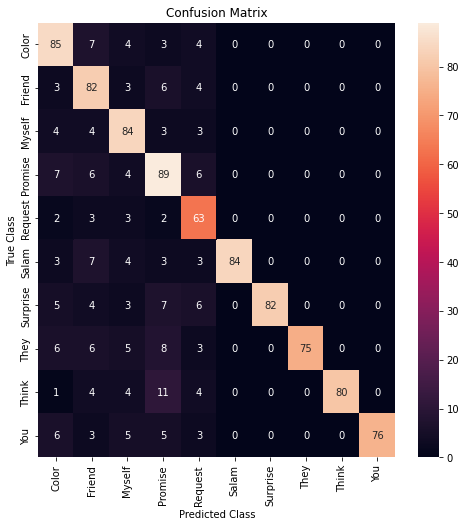

In [27]:
import seaborn as sns
plt.figure(figsize=(8, 8))
heatmap = sns.heatmap(c_m, xticklabels=labels, yticklabels=labels, annot=True, fmt='d', color='blue')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.title('Confusion Matrix')
plt.show()